In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from webdriver_manager.chrome import ChromeDriverManager
import re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException

In [ ]:
all_data = pd.DataFrame(columns = ['cost','area'])

driver = webdriver.Chrome()

def grab_page(url):

    driver.get(url)
    data = []

    table = WebDriverWait(driver, 3).until(
        EC.visibility_of_element_located((By.CSS_SELECTOR,".shop_list.shop_list_4"))
    )

    table.text

    rows = table.find_elements(By.TAG_NAME,'dl')


    for row in rows:
        price_dd = row.find_elements(By.CLASS_NAME,'price_right')
        price_b = price_dd[0].find_elements(By.TAG_NAME,'b') if price_dd else []
        cost = price_b[0].text if price_b else None

        area_p = row.find_elements(By.CLASS_NAME,'tel_shop')
        area_text = area_p[0].text if area_p else ''
        area_match = re.search(r'(\d+\.?\d*)㎡', area_text)
        area = area_match.group(1) if area_match else None

        data.append((cost,area))

    df = pd.DataFrame(data,columns=['cost','area'])
    return df

for i in range(1,21):
    url = f"https://esf.fang.com/house-a015277-b02313/i3{i}/"
    page_df = grab_page(url)
    all_data = pd.concat([all_data,page_df],ignore_index=True)

driver.quit()
print(all_data)

In [17]:
all_data2 = pd.DataFrame(columns = ['cost','area'])

driver = webdriver.Chrome()

def grab_page(url):

    driver.get(url)
    data = []

    table = WebDriverWait(driver, 3).until(
        EC.visibility_of_element_located((By.CLASS_NAME,"houseList"))
    )

    table.text

    rows = table.find_elements(By.TAG_NAME,'dl')


    for row in rows:
        price_dd = row.find_elements(By.CLASS_NAME,'moreInfo')
        price_b = price_dd[0].find_elements(By.CLASS_NAME,'price') if price_dd else []
        cost = price_b[0].text if price_b else None

        area_p = row.find_elements(By.CSS_SELECTOR,'.font15.mt12.bold')
        area_text = area_p[0].text if area_p else ''
        area_match = re.search(r'(\d+\.?\d*)㎡', area_text)
        area = area_match.group(1) if area_match else None

        data.append((cost,area))

    df = pd.DataFrame(data,columns=['cost','area'])
    return df

for i in range(1,21):
    url = f"https://zu.fang.com/house-a015277-b02313/i3{i}/"
    page_df = grab_page(url)
    all_data2 = pd.concat([all_data2,page_df],ignore_index=True)

driver.quit()
print(all_data2)

        cost area
0      58000  468
1      80000  416
2     138000  330
3     120000  381
4      58000  307
...      ...  ...
1195   19000  181
1196    9000   68
1197   13000  105
1198   22000  177
1199   19000  181

[1200 rows x 2 columns]


In [40]:
all_data2['cost'] = pd.to_numeric(all_data2['cost'],errors='coerce')
all_data2['area'] = pd.to_numeric(all_data2['area'],errors='coerce')
all_data2 = all_data2.dropna()

csv_file = r"C:\Users\lldlu\Desktop\wl_rent.csv"
all_data2.to_csv(csv_file, index=False)

In [60]:
wl_rent = pd.read_csv("wl_rent.csv",encoding="gbk")
wl_buy = pd.read_csv("wl_buy.csv",encoding="gbk")
szq_rent = pd.read_csv("szq_rent.csv")
szq_buy = pd.read_csv("szq_buy.csv")
btpz_rent = pd.read_csv("btpz_rent.csv")
btpz_buy = pd.read_csv("btpz_buy.csv")
sjc_buy = pd.read_csv("shijicheng_esf.csv")
sjc_rent = pd.read_csv("shijicheng_rent.csv")

In [61]:
szq_buy = szq_buy.rename(columns={'总价(万元)':'price','面积':'area'})
szq_buy['price'] = pd.to_numeric(szq_buy['price'],errors='coerce')
szq_buy['area'] = pd.to_numeric(szq_buy['area'],errors='coerce')
szq_buy = szq_buy[['price','area']]
szq_rent = szq_rent.rename(columns={'总价':'cost','租赁面积':'area'})
szq_rent['cost'] = pd.to_numeric(szq_rent['cost'],errors='coerce')
szq_rent['area'] = pd.to_numeric(szq_rent['area'],errors='coerce')
szq_rent = szq_rent[['cost','area']]

In [62]:
print(szq_buy)
print(szq_rent)

      price    area
0     720.0   91.28
1     398.0   56.70
2     480.0   58.70
3    1255.0  254.00
4     398.0   56.70
..      ...     ...
303   680.0   60.94
304   520.0   66.85
305   720.0   82.17
306  1179.0  196.70
307   240.0     NaN

[308 rows x 2 columns]
        cost   area
0    10200.0   66.0
1    15000.0   74.0
2    12500.0   85.0
3     9500.0   58.0
4     6500.0   57.0
..       ...    ...
341   8100.0   67.0
342   9000.0   72.0
343   7600.0   60.0
344  16500.0  197.0
345   6500.0   53.0

[346 rows x 2 columns]


In [63]:
btpz_buy = btpz_buy.rename(columns={'总价':'price','面积':'area'})
btpz_buy['price'] = btpz_buy['price'].str.replace('万','',regex=False)
btpz_buy['area'] = btpz_buy['area'].str.replace('㎡','',regex=False)
btpz_buy = btpz_buy[['price','area']]

In [64]:
btpz_buy['price'] = pd.to_numeric(btpz_buy['price'],errors='coerce')
btpz_buy['area'] = pd.to_numeric(btpz_buy['area'],errors='coerce')

In [65]:
btpz_rent = btpz_rent.rename(columns={'租价':'cost','面积':'area'})
btpz_rent['cost'] = btpz_rent['cost'].str.replace('元/月','',regex=False)
btpz_rent['area'] = btpz_rent['area'].str.replace('㎡','',regex=False)
btpz_rent = btpz_rent[['cost','area']]

In [66]:
btpz_rent['cost'] = pd.to_numeric(btpz_rent['cost'],errors='coerce')
btpz_rent['area'] = pd.to_numeric(btpz_rent['area'],errors='coerce')

In [67]:
print(btpz_buy)
print(btpz_rent)

     price    area
0      598   81.07
1      760   93.49
2      299   33.15
3      585   60.30
4      750   85.87
..     ...     ...
192    970   92.12
193   3160  269.57
194    279   72.54
195    179   54.58
196   2399  317.72

[197 rows x 2 columns]
      cost  area
0     2550    20
1     6300    60
2     7400    53
3     2650    20
4     2700    15
..     ...   ...
247   7500    50
248   6300    55
249   7700    62
250  25000   181
251   9500    90

[252 rows x 2 columns]


In [68]:
wl_buy = wl_buy.rename(columns={'cost':'price'})
wl_buy = wl_buy[['price','area']]
wl_buy['price'] = pd.to_numeric(wl_buy['price'],errors='coerce')
wl_buy['area'] = pd.to_numeric(wl_buy['area'],errors='coerce')

In [69]:
print(wl_buy)
wl_rent['cost'] = pd.to_numeric(wl_rent['cost'],errors='coerce')
wl_rent['area'] = pd.to_numeric(wl_rent['area'],errors='coerce')
print(wl_rent)

      price    area
0      1499  151.00
1      1550  142.54
2      2400  114.59
3      1499  151.00
4      2100  150.21
...     ...     ...
1195   2380  176.40
1196   1266  117.97
1197   1150   90.00
1198    568   51.84
1199   2820  160.41

[1200 rows x 2 columns]
        cost  area
0     138000   330
1      80000   416
2      58000   468
3     120000   381
4      58000   307
...      ...   ...
1195    6500    52
1196    5500    47
1197    5600    52
1198   14000   112
1199   85000   389

[1200 rows x 2 columns]


In [70]:
sjc_buy = sjc_buy.rename(columns={'total_price_wan（万元）':'price','area_sqm（平方米）':'area'})
sjc_buy['price'] = pd.to_numeric(sjc_buy['price'],errors='coerce')
sjc_buy['area'] = pd.to_numeric(sjc_buy['area'],errors='coerce')
sjc_buy.drop(columns = "unit_price（元/平方米）", inplace=True)
sjc_buy["price"] = sjc_buy["price"]/10000
print(sjc_buy)
sjc_rent = sjc_rent.rename(columns={'月租金(元)':'cost','面积(㎡)':'area'})
sjc_rent['cost'] = pd.to_numeric(sjc_rent['cost'],errors='coerce')
sjc_rent['area'] = pd.to_numeric(sjc_rent['area'],errors='coerce')
print(sjc_rent)

        area   price
0     107.00  1060.0
1     172.34  1546.0
2      86.30  1020.0
3     209.00  2100.0
4     289.07  5300.0
...      ...     ...
1197  119.25  1700.0
1198  239.00  2520.0
1199  125.65  1466.0
1200  156.47  1260.0
1201  124.37  1650.0

[1202 rows x 2 columns]
       area   cost
0     204.0  22000
1     207.0  20000
2     122.0  12500
3     213.0  29000
4     156.0  13500
...     ...    ...
1195  161.0  17500
1196  172.0  18500
1197  178.0  18500
1198  161.0  19000
1199  216.0  30000

[1200 rows x 2 columns]


In [71]:
#删除重复
wl_buy.drop_duplicates(inplace=True)
wl_rent.drop_duplicates(inplace=True)
szq_buy.drop_duplicates(inplace=True)
szq_rent.drop_duplicates(inplace=True)
btpz_buy.drop_duplicates(inplace=True)
btpz_rent.drop_duplicates(inplace=True)
sjc_buy.drop_duplicates(inplace=True)
sjc_rent.drop_duplicates(inplace=True)

In [72]:
wl_buy.dropna(inplace=True)
wl_rent.dropna(inplace=True)
szq_buy.dropna(inplace=True)
szq_rent.dropna(inplace=True)
btpz_buy.dropna(inplace=True)
btpz_rent.dropna(inplace=True)
sjc_buy.dropna(inplace=True)
sjc_rent.dropna(inplace=True)

In [73]:
wl_buy = wl_buy[(wl_buy["price"] > 10) & (wl_buy["price"] < 100000)]
wl_rent = wl_rent[(wl_rent["cost"] > 1000) & (wl_rent["cost"] < 1000000)]
szq_buy = szq_buy[(szq_buy["price"] > 10) & (szq_buy["price"] < 100000)]
szq_rent = szq_rent[(szq_rent["cost"] > 1000) & (szq_rent["cost"] < 1000000)]
btpz_buy = btpz_buy[(btpz_buy["price"] > 10) & (btpz_buy["price"] < 100000)]
btpz_rent = btpz_rent[(btpz_rent["cost"] > 1000) & (btpz_rent["cost"] < 1000000)]
sjc_buy = sjc_buy[(sjc_buy["price"] > 10) & (sjc_buy["price"] < 100000)]
sjc_rent = sjc_rent[(sjc_rent["cost"] > 1000) & (sjc_rent["cost"] < 1000000)]

In [74]:
#比率值
wl_buy['price-area'] = wl_buy['price']/wl_buy['area']
wl_rent['cost-area'] = wl_rent['cost']/wl_rent['area']
szq_buy['price-area'] = szq_buy['price']/szq_buy['area']
szq_rent['cost-area'] = szq_rent['cost']/szq_rent['area']
btpz_buy['price-area'] = btpz_buy['price']/btpz_buy['area']
btpz_rent['cost-area'] = btpz_rent['cost']/btpz_rent['area']
sjc_buy['price-area'] = sjc_buy['price']/sjc_buy['area']
sjc_rent['cost-area'] = sjc_rent['cost']/sjc_rent['area']

In [85]:
print(szq_buy)
print(szq_rent)
print(btpz_buy)
print(btpz_rent)
print(wl_buy)
print(wl_rent)
print(sjc_buy)
print(sjc_rent)

      price    area  price-area  location
0     720.0   91.28    7.887818         1
1     398.0   56.70    7.019400         1
2     480.0   58.70    8.177172         1
3    1255.0  254.00    4.940945         1
5     580.0   66.91    8.668360         1
..      ...     ...         ...       ...
293   490.0   66.75    7.340824         1
295   828.0   92.20    8.980477         1
296   430.0   65.00    6.615385         1
297   700.0   67.37   10.390381         1
303   680.0   60.94   11.158517         1

[160 rows x 4 columns]
        cost   area   cost-area  location
0    10200.0   66.0  154.545455         1
1    15000.0   74.0  202.702703         1
2    12500.0   85.0  147.058824         1
3     9500.0   58.0  163.793103         1
4     6500.0   57.0  114.035088         1
..       ...    ...         ...       ...
334   8290.0   69.0  120.144928         1
337   8000.0   65.0  123.076923         1
339   8000.0   49.0  163.265306         1
341   8100.0   67.0  120.895522         1
344  16500

In [84]:
szq_buy["location"] = 1
szq_rent["location"] = 1
sjc_buy["location"] = 2
sjc_rent["location"] = 2
wl_buy["location"] = 3
wl_rent["location"] = 3
btpz_buy["location"] = 4
btpz_rent["location"] = 4

In [79]:
wl_rent['cost-area'].describe()
szq_rent['cost-area'].describe()
btpz_rent['cost-area'].describe()

count    160.000000
mean     140.198131
std       32.660131
min       88.495575
25%      117.454770
50%      132.438998
75%      154.293860
max      291.666667
Name: cost-area, dtype: float64

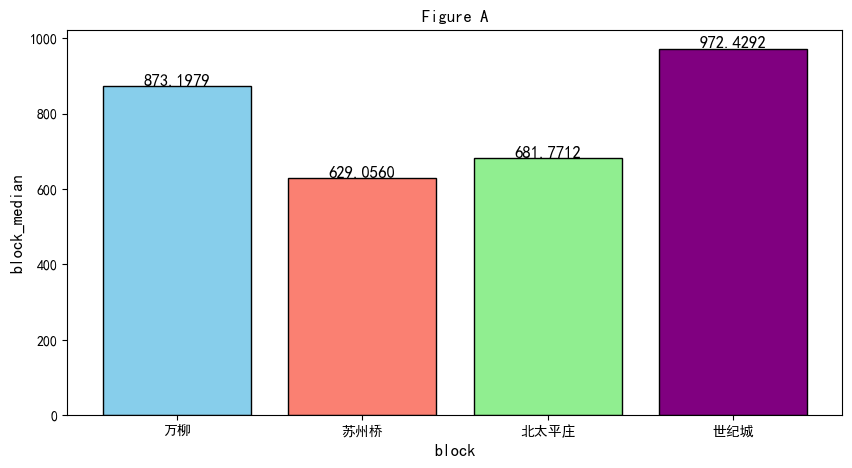

In [104]:
# price to rent ratio
wrm = wl_rent['cost-area'].median()
srm = szq_rent['cost-area'].median()
brm = btpz_rent['cost-area'].median()
sjrm = sjc_rent['cost-area'].median()
wbm = wl_buy['price-area'].median()
sbm = szq_buy['price-area'].median()
bbm = btpz_buy['price-area'].median()
sjbm = sjc_buy['price-area'].median()
values = [(wbm*10000)/wrm, (sbm*10000)/srm, (bbm*10000)/brm, (sjbm*10000)/sjrm]
labels = ['万柳', '苏州桥', '北太平庄', '世纪城']

plt.rcParams["font.family"] = ["SimHei"]
plt.figure(figsize=(10,5))
bars = plt.bar(labels, values, color=['skyblue', 'salmon', 'lightgreen', 'purple'], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+1, f'{height:.4f}', ha='center',fontsize=12)
plt.title("Figure A")
plt.xlabel('block', fontsize=12)
plt.ylabel('block_median',fontsize=12)
plt.show()

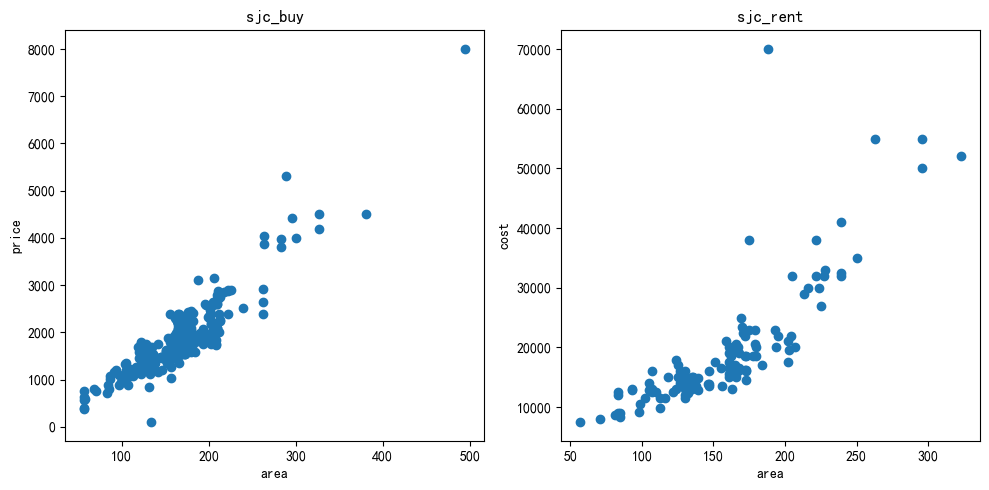

In [83]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.scatter(sjc_buy["area"],sjc_buy["price"])
ax1.set_title("sjc_buy")
ax1.set_xlabel("area")
ax1.set_ylabel("price")
ax2.scatter(sjc_rent["area"],sjc_rent["cost"])
ax2.set_title("sjc_rent")
ax2.set_xlabel("area")
ax2.set_ylabel("cost")
plt.tight_layout()
plt.show()

In [86]:
merge_buy = pd.concat(
    [szq_buy, sjc_buy, wl_buy, btpz_buy],
    axis=0,
    ignore_index=True
)
merge_rent = pd.concat(
    [szq_rent, sjc_rent, wl_rent, btpz_rent],
    axis=0,
    ignore_index=True
)

In [88]:
print(merge_buy)
print(merge_rent)

      price    area  price-area  location
0     720.0   91.28    7.887818         1
1     398.0   56.70    7.019400         1
2     480.0   58.70    8.177172         1
3    1255.0  254.00    4.940945         1
4     580.0   66.91    8.668360         1
..      ...     ...         ...       ...
827   730.0   82.71    8.826019         4
828  1620.0  126.44   12.812401         4
829   399.0   47.00    8.489362         4
830   260.0   26.50    9.811321         4
831  1850.0  207.08    8.933745         4

[832 rows x 4 columns]
        cost   area   cost-area  location
0    10200.0   66.0  154.545455         1
1    15000.0   74.0  202.702703         1
2    12500.0   85.0  147.058824         1
3     9500.0   58.0  163.793103         1
4     6500.0   57.0  114.035088         1
..       ...    ...         ...       ...
617   9500.0   74.0  128.378378         4
618   5300.0   26.0  203.846154         4
619   8659.0   57.0  151.912281         4
620  25000.0  181.0  138.121547         4
621   9500

In [90]:
merge_buy.to_csv("merge_buy.csv", index=False)
merge_rent.to_csv("merge_rent.csv", index=False)
wl_buy.to_csv("wl_datab.csv", index=False)
wl_rent.to_csv("wl_datar.csv", index=False)
szq_buy.to_csv("szq_datab.csv", index=False)
szq_rent.to_csv("szq_datar.csv", index=False)
sjc_buy.to_csv("sjc_datab.csv", index=False)
sjc_rent.to_csv("sjc_datar.csv", index=False)
btpz_buy.to_csv("btpz_datab.csv", index=False)
btpz_rent.to_csv("btpz_datar.csv", index=False)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def regression1(df):
    
    X = df[['area','location']]
    y = df[['price-area']]
    model = LinearRegression()
    model.fit(X,y)
    r2 = model.score(X, y)

    return model.coef_.flatten(), model.intercept_ , r2

def regression2(df):
    
    X = df[['area','location']]
    y = df[['cost-area']]
    model = LinearRegression()
    model.fit(X,y)
    r2 = model.score(X, y)

    return model.coef_.flatten(), model.intercept_  , r2

In [100]:
print(regression1(merge_buy))
print(regression2(merge_rent))

(array([0.02641104, 0.83273891]), array([5.67139571]), 0.35982572363936227)
(array([0.07510961, 5.72453664]), array([121.34948778]), 0.05154688236634375)


In [103]:
def re_reg_1(df):
    
    predict_series = 0.02641104 * df['area'] + 0.83273891 * df['location'] + 5.67139571
    
    return predict_series.median()

def re_reg_2(df):
    
    predict_series = 0.07510961 * df['area'] +5.72453664 * df['location'] + 121.34948778
    
    return predict_series.median()

szq_pre1 = (re_reg_1(szq_buy)*10000)/re_reg_2(szq_rent)
sjc_pre1 = (re_reg_1(sjc_buy)*10000)/re_reg_2(sjc_rent)
wl_pre1 = (re_reg_1(wl_buy)*10000)/re_reg_2(wl_rent)
btpz_pre1 = (re_reg_1(btpz_buy)*10000)/re_reg_2(btpz_rent)
print(szq_pre1)
print(sjc_pre1)
print(wl_pre1)
print(btpz_pre1)

627.2354862796029
805.1676389543576
802.8417943169347
780.7356672766114


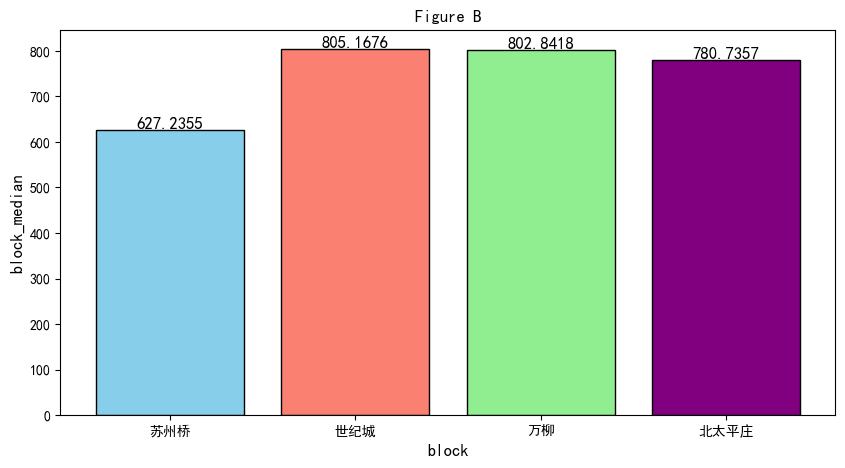

In [106]:
values = [szq_pre1, sjc_pre1, wl_pre1, btpz_pre1]
labels = ['苏州桥', '世纪城', '万柳', '北太平庄']

plt.rcParams["font.family"] = ["SimHei"]
plt.figure(figsize=(10,5))
bars = plt.bar(labels, values, color=['skyblue', 'salmon', 'lightgreen', 'purple'], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+1, f'{height:.4f}', ha='center',fontsize=12)
plt.title("Figure B")
plt.xlabel('block', fontsize=12)
plt.ylabel('block_median',fontsize=12)
plt.show()

In [109]:
def regression1_plus(df):
    
    df_new = df.copy()
    df_new['area_sq'] = df_new['area']**2
    df_new['area_loc'] = df_new['area']*df_new['location']
    
    X = df_new[['area','location', 'area_sq', 'area_loc']]
    y = df_new[['price-area']]
    
    model = LinearRegression()
    model.fit(X,y)
    r2 = model.score(X, y)

    return model.coef_.flatten(), model.intercept_ , r2

def regression2_plus(df):
    
    df_new = df.copy()
    df_new['area_sq'] = df_new['area']**2
    df_new['area_loc'] = df_new['area']*df_new['location']
    
    X = df_new[['area','location', 'area_sq', 'area_loc']]
    y = df_new[['cost-area']]
    
    model = LinearRegression()
    model.fit(X,y)
    r2 = model.score(X, y)

    return model.coef_.flatten(), model.intercept_ , r2

In [110]:
print(regression1_plus(merge_buy))
print(regression2_plus(merge_rent))

(array([ 1.74971851e-02,  6.70273963e-02, -1.93661772e-05,  6.49709174e-03]), array([6.97129049]), 0.3709980011291011)
(array([-4.66224509e-01, -1.29042358e+01, -1.83244863e-04,  2.44775969e-01]), array([161.98806178]), 0.156146004966066)


In [118]:
def re_reg_1plus(df):
    predict_series = 1.74971851e-02 * df['area'] + \
                     6.70273963e-02 * df['location'] + \
                     -1.93661772e-05 * (df['area'])**2 + \
                     6.49709174e-03 * ((df['area'])*df['location']) + \
                     6.97129049
    return predict_series.median()

def re_reg_2plus(df):
    predict_series = -4.66224509e-01 * df['area'] + \
                     -1.29042358e+01 * df['location'] + \
                     -1.83244863e-04 * (df['area'])**2 + \
                     2.44775969e-01 * ((df['area'])*df['location']) + \
                     161.98806178
    return predict_series.median()

szq_pre2 = (re_reg_1plus(szq_buy)*10000)/re_reg_2plus(szq_rent)
sjc_pre2 = (re_reg_1plus(sjc_buy)*10000)/re_reg_2plus(sjc_rent)
wl_pre2 = (re_reg_1plus(wl_buy)*10000)/re_reg_2plus(wl_rent)
btpz_pre2 = (re_reg_1plus(btpz_buy)*10000)/re_reg_2plus(btpz_rent)
print(szq_pre2)
print(sjc_pre2)
print(wl_pre2)
print(btpz_pre2)

636.4231696328109
856.8324965995239
751.3732930035947
814.5695946782428


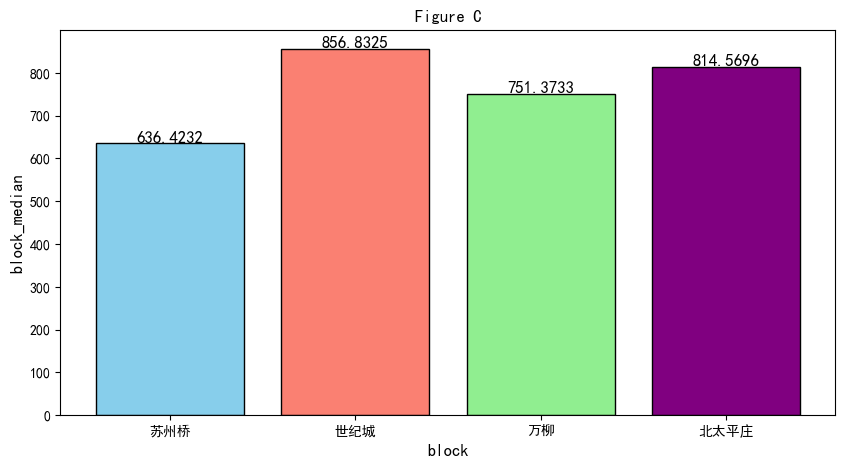

In [119]:
values = [szq_pre2, sjc_pre2, wl_pre2, btpz_pre2]
labels = ['苏州桥', '世纪城', '万柳', '北太平庄']

plt.rcParams["font.family"] = ["SimHei"]
plt.figure(figsize=(10,5))
bars = plt.bar(labels, values, color=['skyblue', 'salmon', 'lightgreen', 'purple'], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+1, f'{height:.4f}', ha='center',fontsize=12)
plt.title("Figure C")
plt.xlabel('block', fontsize=12)
plt.ylabel('block_median',fontsize=12)
plt.show()

The outcome of three methods are different.
I would more trust the result by model1 and model2 plus, because the r2 is higher, other improved model should be tested, which can provide more imformation.